1. Choose K
2. Choose K centroids (Randomly choose K indices from the num of 3. samples, choose the samples of these indices)
3. Calculate distance for samples and all centroids
4. Assign clusters
5. Recalculate centroids
6. Converging or not

In [1]:
#Import python libraries
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#Create euclidean distance funciton
def euclidean_distance(x1,x2):
  return np.sqrt(np.sum((x1 - x2)**2));

In [3]:
#Create  a class KMeans along with methods to predict the result

class KMeans:
  def __init__(self, K=5, max_iters=100):
    self.k = K
    self.max_iters = max_iters
    self.clusters = None
    self.centroids = []

  def fit(self, X):
    self.x = X
    n_samples, n_features = X.shape
    random_samples_indices = np.random.choice(n_samples, self.k, replace=False)
    for idx in random_samples_indices:
      self.centroids.append(X[idx])

    for i in range(self.max_iters):
      self.clusters = self.create_clusters(self.centroids)
      old_centroids = self.centroids
      self.centroids = self.get_centroids(self.clusters)
      is_converged = self.is_converged(old_centroids, self.centroids)
      if is_converged:
        break

    return self.get_cluster_labels(self.clusters)

  def get_cluster_labels(self, clusteres):
    labels = np.empty(self.x.shape[0])
    for idx, cluster in enumerate(clusteres):
      for sample in cluster:
        labels[sample] = idx
    return np.array(labels)

  def create_clusters(self, centroids):
    clusters = []
    for i in range(self.k):
      clusters.append([])

    for idx, sample in enumerate(self.x):
      closest_centroid_idx = self.closest_centroid(sample, centroids)
      clusters[closest_centroid_idx].append(idx)
    return clusters

  def closest_centroid(self, sample, centroids):
    distances = []
    for idx, centroid in enumerate(centroids):
      distances.append(euclidean_distance(sample, centroid))
    return np.argmin(distances)

  def get_centroids(self, clusteres):
    new_centroids = []
    for cluster in clusteres:
      new_centroids.append(np.mean(self.x[cluster], axis=0))
    return new_centroids

  def is_converged(self, centroids_old, centroids, tol=1e-4):
    distances = []
    for centroid in centroids:
      distances.append(euclidean_distance(centroid, centroids_old))
    total = sum(distances)
    return total < tol


In [ ]:
#Create a dummy dataset
x= np.array([[1,9], [2,7], [4,3], [5,3],[7,2],[8,4],[10,11],[11,9],[9,10],[12,8]])
print(x)  

[[ 1  9]
 [ 2  7]
 [ 4  3]
 [ 5  3]
 [ 7  2]
 [ 8  4]
 [10 11]
 [11  9]
 [ 9 10]
 [12  8]]


In [12]:
#Train the model
model = KMeans(K=3)
labels = model.fit(x)
print(labels)

[0. 0. 1. 1. 1. 1. 2. 2. 2. 2.]


In [13]:
#centroid
centroids = np.array(model.centroids)
print(centroids)

[[ 1.5  8. ]
 [ 6.   3. ]
 [10.5  9.5]]


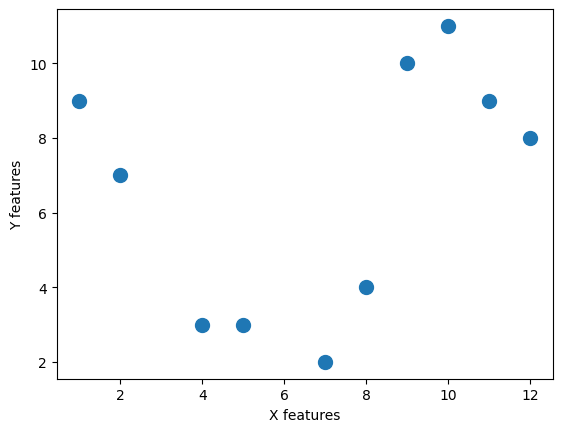

In [14]:
plt.scatter(x[ :, 0],  x[ : , 1], s=100)
plt.xlabel("X features")
plt.ylabel("Y features")
plt.show()

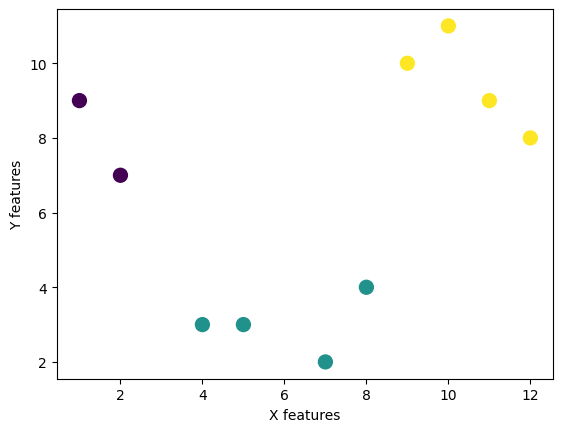

In [15]:
plt.scatter(x[ :, 0],  x[ : , 1], c=labels, cmap='viridis', s=100, label="Data Points")
plt.xlabel("X features")
plt.ylabel("Y features")
plt.show()

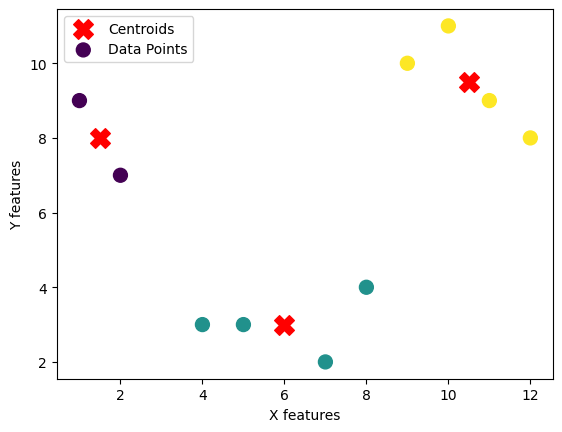

In [16]:
plt.scatter(centroids[ :, 0],  centroids[ : , 1], c='red', marker='X', s=200, label="Centroids")
plt.scatter(x[ :, 0],  x[ : , 1], c=labels, cmap='viridis', s=100, label="Data Points")
plt.xlabel("X features")
plt.ylabel("Y features")
plt.legend()
plt.show()